In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['price'] =boston.target

# Gradient Descent from scrath.

In [4]:
y = bos['price']
x = bos['LSTAT'] 

0.5094592088932806 10.012412549407115


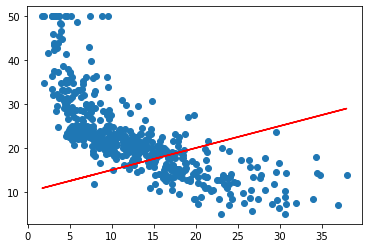

-0.039099842039645456 19.380761840702593


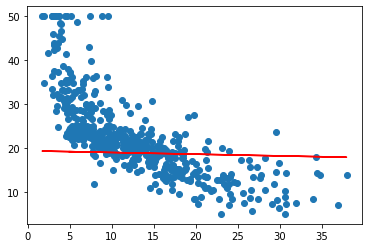

-0.38682309107076135 25.17255630709799


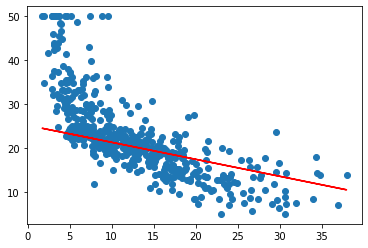

-0.6018151004872049 28.753534955856566


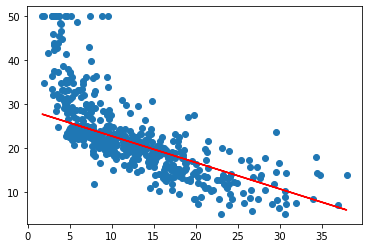

-0.7347413981728267 30.967599725811365


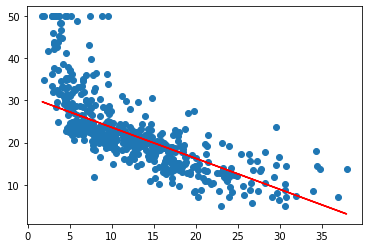

-0.8169277113496061 32.33652238254208


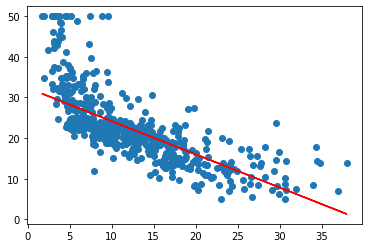

-0.8677422619027859 33.18290649268233


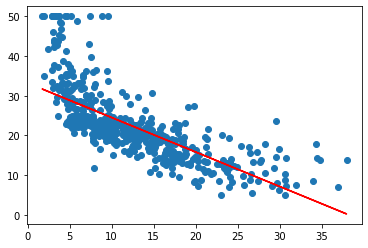

-0.8991601275803366 33.70621294712336


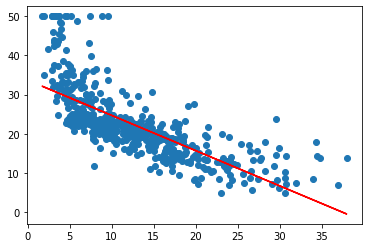

-0.918585317274765 34.02976538859617


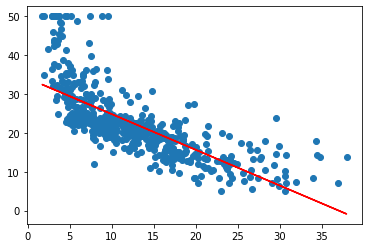

-0.9305956173548912 34.22981295440502


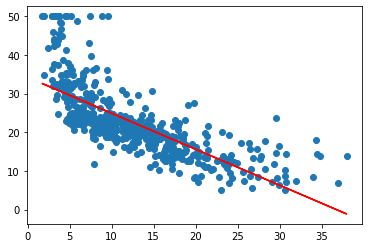

m:  -0.9380156191794355 c:  34.353402980748626


In [5]:
m = 0.5            # Random value of m
c = 10             # intercept value
LR = 0.001         # lets choose a small learning rate
epochs = 10000     # epochs - no of times of itrations
n = len(y)         # no of observations.

for i in range(epochs):
    y_pred = m*x + c
    D_m = -(2/n)*sum((y-y_pred)*x)     # from the formula.(this is slope)
    D_c = -(2/n)*sum((y-y_pred))           
    
    m = m-D_m*LR        # adjusting the m using slope and LR
    c = c-D_c*LR
    
    if (i%1000) ==0:
        print(m,c)
        plt.scatter(x,y)
        plt.plot(x, y_pred,'r')
        plt.show()
        
print('m: ',m, 'c: ',c)        

# Evaluating Overfit/Underfit -Train-Test Approach

In [6]:
y = bos['price']
X = bos.drop('price',axis=1)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(x_train.shape, x_test.shape)

(354, 13) (152, 13)


In [9]:
lir = LinearRegression(fit_intercept=True)     # This does the job of add_constant no need od adding constant and all in ML
lir.fit(x_train, y_train)                      # X first and Y second in ML

LinearRegression()

In [10]:
lir.coef_                       # This gives us the coeffs of variables

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [11]:
pd.DataFrame(lir.coef_, index=X.columns, columns=['coefs'])

,coefs
CRIM,-0.133470
ZN,0.035809
INDUS,0.049523
CHAS,3.119835
NOX,-15.417061
RM,4.057199
AGE,-0.010821
DIS,-1.385998
RAD,0.242727
TAX,-0.008702


In [12]:
from sklearn.metrics import r2_score,mean_squared_error

In [13]:
lir.intercept_      # This is the intercept value.

31.631084035693505

In [14]:
y_train_pred = lir.predict(x_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('r-squared train is: ',r2_train)
print('rmse-train: ',rmse_train)


y_test_pred = lir.predict(x_test)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('r-squared test is: ',r2_test)
print('rmse-test: ',rmse_test)

r-squared train is:  0.7434997532004697
rmse-train:  4.748208239685937
r-squared test is:  0.7112260057484923
rmse-test:  4.638689926172828


# Illustration of K-Fold Cross Validation:-

In [15]:
x = [1,2,3,4,5,6,7,8,9]
y = [10,20,30,40,50,60,70,80,90]

In [16]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)                    # dividing data into 3 splits.

# here we have 9 observations, if splits by 3 observations.
# if we need to split by say, 4,2...
# it makes the adjustments in splitting and gives output

for d1, d2 in kf.split(y):
    x_train = np.array(x)[d1]
    y_train = np.array(y)[d1]
    
    x_test = np.array(x)[d2]
    y_test = np.array(y)[d2]
    
    print('\n')
    print('x_train: ',x_train, 'y_train: ',y_train)
    print('x_test: ',x_test, 'y_test: ',y_test)    



x_train:  [4 5 6 7 8 9] y_train:  [40 50 60 70 80 90]
x_test:  [1 2 3] y_test:  [10 20 30]


x_train:  [1 2 3 7 8 9] y_train:  [10 20 30 70 80 90]
x_test:  [4 5 6] y_test:  [40 50 60]


x_train:  [1 2 3 4 5 6] y_train:  [10 20 30 40 50 60]
x_test:  [7 8 9] y_test:  [70 80 90]


In [17]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

for d1,d2 in loo.split(y):
    x_train = np.array(x)[d1]
    y_train = np.array(y)[d1]
    
    x_test = np.array(x)[d2]
    y_test = np.array(y)[d2]
    
    print('\n')
    print('x_train: ',x_train, 'y_train: ',y_train)
    print('x_test: ',x_test, 'y_test: ',y_test)   



x_train:  [2 3 4 5 6 7 8 9] y_train:  [20 30 40 50 60 70 80 90]
x_test:  [1] y_test:  [10]


x_train:  [1 3 4 5 6 7 8 9] y_train:  [10 30 40 50 60 70 80 90]
x_test:  [2] y_test:  [20]


x_train:  [1 2 4 5 6 7 8 9] y_train:  [10 20 40 50 60 70 80 90]
x_test:  [3] y_test:  [30]


x_train:  [1 2 3 5 6 7 8 9] y_train:  [10 20 30 50 60 70 80 90]
x_test:  [4] y_test:  [40]


x_train:  [1 2 3 4 6 7 8 9] y_train:  [10 20 30 40 60 70 80 90]
x_test:  [5] y_test:  [50]


x_train:  [1 2 3 4 5 7 8 9] y_train:  [10 20 30 40 50 70 80 90]
x_test:  [6] y_test:  [60]


x_train:  [1 2 3 4 5 6 8 9] y_train:  [10 20 30 40 50 60 80 90]
x_test:  [7] y_test:  [70]


x_train:  [1 2 3 4 5 6 7 9] y_train:  [10 20 30 40 50 60 70 90]
x_test:  [8] y_test:  [80]


x_train:  [1 2 3 4 5 6 7 8] y_train:  [10 20 30 40 50 60 70 80]
x_test:  [9] y_test:  [90]


# Cross Validation on Boston dataset.
### k-Fold CV

In [18]:
y = bos['price']
X = bos.drop('price',axis=1)

lir = LinearRegression()

In [19]:
kfold = KFold(n_splits=5)

i=1

for train_index, test_index in kfold.split(y):
    x_train = X.iloc[train_index]
    y_train = y[train_index]
   
    x_test = X.iloc[test_index]
    y_test = y[test_index]
    
    lir.fit(x_train,y_train)

    y_train_pred = lir.predict(x_train)
    r2_train = r2_score(y_train, y_train_pred)


    y_test_pred = lir.predict(x_test)
    r2_test = r2_score(y_test, y_test_pred)
    print('iteration:',i,'r-squared train is: ',r2_train,'r-squared test is: ',r2_test)
    i+=1

iteration: 1 r-squared train is:  0.7465253257402231 r-squared test is:  0.6391999371396715
iteration: 2 r-squared train is:  0.7276318496482955 r-squared test is:  0.713866980383324
iteration: 3 r-squared train is:  0.6949805911375606 r-squared test is:  0.5870234363057798
iteration: 4 r-squared train is:  0.8418102698243877 r-squared test is:  0.07923080540508654
iteration: 5 r-squared train is:  0.7354553691891202 r-squared test is:  -0.2529415372544872


In [20]:
bos = bos.sample(frac=1, random_state=4).reset_index(drop=True)
## we are suffling the boston dataset,
## we got the test r-squared results vary very much.
## that should not happen.
## that happened because the data set is already sorted in someway,

y = bos['price']
X = bos.drop('price',axis=1)

lir = LinearRegression()

kfold = KFold(n_splits=5)

i=1

for train_index, test_index in kfold.split(y):
    x_train = X.iloc[train_index]
    y_train = y[train_index]
   
    x_test = X.iloc[test_index]
    y_test = y[test_index]
    
    lir.fit(x_train,y_train)

    y_train_pred = lir.predict(x_train)
    r2_train = r2_score(y_train, y_train_pred)


    y_test_pred = lir.predict(x_test)
    r2_test = r2_score(y_test, y_test_pred)
    print('iteration:',i,'r-squared train is: ',r2_train,'r-squared test is: ',r2_test)
    i+=1

iteration: 1 r-squared train is:  0.7415244219726307 r-squared test is:  0.726345145970251
iteration: 2 r-squared train is:  0.7401692005248535 r-squared test is:  0.7335055965948262
iteration: 3 r-squared train is:  0.7390169106490991 r-squared test is:  0.7405037856708774
iteration: 4 r-squared train is:  0.7335004839380231 r-squared test is:  0.7703314589608903
iteration: 5 r-squared train is:  0.7563209151603548 r-squared test is:  0.6629289207785674


In [21]:
### we take the average of the test result and that is the performance of our model.

# Cross- Validation using Algorithm:

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
lir = LinearRegression()
cv = cross_val_score(lir, X, y, cv=5, scoring='r2')
cv

## the below result is the r-squared value of tests

array([0.72634515, 0.7335056 , 0.74050379, 0.77033146, 0.66292892])

In [24]:
## This is the average and std of the test results
## thats the perfromance of the model:-

print('Overall Result: ',cv.mean(), cv.std())

Overall Result:  0.7267229815950824 0.0352347518242856


# Day-02 LiR - RFE 

In [25]:
from sklearn.datasets import load_boston
boston = load_boston()

In [26]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['price'] = boston.target

In [27]:
## shuffling the data:
bos = bos.sample(frac=1, random_state=4).reset_index(drop=True)

In [28]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
1,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51,24.8
2,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09,17.4
3,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98,19.3
4,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6


# RFE - Recursive Feature Elimination.

In [201]:
y = bos['price']
X = bos.drop('price',axis=1)

In [202]:
## Adding square tames (squared variables)

cols = list(X.columns)
cols.remove('CHAS')       ## CHAS is dummy variable so drop that.

for col in cols:
    X[col+'2'] = X[col]**2

cols = list(X.columns)
cols

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'CRIM2',
 'ZN2',
 'INDUS2',
 'NOX2',
 'RM2',
 'AGE2',
 'DIS2',
 'RAD2',
 'TAX2',
 'PTRATIO2',
 'B2',
 'LSTAT2']

In [203]:
X.shape

(506, 25)

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lir = LinearRegression()                   # This is just an estimater where rfe needs estimater.

rfe = RFE(lir , n_features_to_select=10)
rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [33]:
rf = pd.DataFrame(rfe.ranking_ , index=X.columns, columns=['select'])
rf.sort_values('select')

## The variables are selected given rank 1. and rest rejected.

,select
CRIM,1
DIS2,1
RM2,1
NOX2,1
PTRATIO,1
DIS,1
LSTAT,1
RM,1
NOX,1
CHAS,1


# Grid Search to identify the best number of features.

In [34]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [35]:
from sklearn.model_selection import GridSearchCV

lir = LinearRegression()
rfe = RFE(lir)

params = [{'n_features_to_select':list(range(1,26))}]

gsearch = GridSearchCV(rfe, param_grid=params, scoring='r2', cv=3, return_train_score=True)
gsearch.fit(X,y)

GridSearchCV(cv=3, estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25]}],
             return_train_score=True, scoring='r2')

In [36]:
gsearch.best_params_

{'n_features_to_select': 18}

In [37]:
pd.DataFrame(gsearch.cv_results_).iloc[:,4:].head(2)  # we dont need first 4 columns so slice it

## The mean_test_score is average_r-squared value.
## The rank 1, say that no of variables needed to be selected.

,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1,{'n_features_to_select': 1},0.123653,0.204741,0.196705,0.175033,0.036479,25,0.212407,0.164513,0.176541,0.184487,0.020344
1,2,{'n_features_to_select': 2},0.118997,0.214394,0.203094,0.178828,0.042558,24,0.222847,0.166266,0.180428,0.189847,0.024040


In [38]:
cvr = pd.DataFrame(gsearch.cv_results_).iloc[:,4:]
cvr.head()

,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1,{'n_features_to_select': 1},0.123653,0.204741,0.196705,0.175033,0.036479,25,0.212407,0.164513,0.176541,0.184487,0.020344
1,2,{'n_features_to_select': 2},0.118997,0.214394,0.203094,0.178828,0.042558,24,0.222847,0.166266,0.180428,0.189847,0.024040
2,3,{'n_features_to_select': 3},0.569563,0.475410,0.500689,0.515221,0.039788,23,0.498819,0.556364,0.551531,0.535571,0.026063
3,4,{'n_features_to_select': 4},0.571525,0.510870,0.503556,0.528651,0.030464,22,0.526500,0.567804,0.575304,0.556536,0.021458
4,5,{'n_features_to_select': 5},0.632146,0.659056,0.556772,0.615992,0.043292,21,0.628622,0.628585,0.670790,0.642666,0.019887


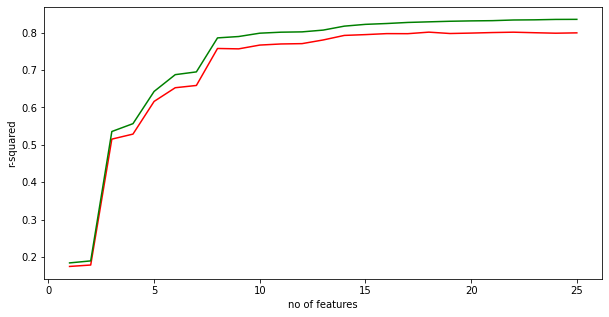

In [39]:
plt.figure(figsize=[10,5])
plt.plot(cvr['param_n_features_to_select'],cvr['mean_test_score'],'r')
plt.plot(cvr['param_n_features_to_select'],cvr['mean_train_score'],'g')
plt.xlabel('no of features')
plt.ylabel('r-squared')
plt.show()

In [40]:
### Finalizing the model:-


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lir = LinearRegression()                   

rfe = RFE(lir , n_features_to_select=18)
rfe.fit(X_train, y_train)

y_test_pred = rfe.predict(X_test)
print('Test-rsquared: ',r2_score(y_test, y_test_pred))

Test-rsquared:  0.7317545051247563


In [41]:
### RFE - Backward feature selection.

In [42]:
!pip install mlxtend
import mlxtend

# Step Forward Selection

In [43]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [44]:
X.shape

(506, 25)

In [45]:
lir = LinearRegression()

sfs1 = sfs(lir, scoring='r2',cv=3, k_features=25, verbose=2)
sfs1.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished

[2021-06-02 22:39:05] Features: 1/25 -- score: 0.5225088983525342[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished

[2021-06-02 22:39:05] Features: 2/25 -- score: 0.6460989708912966[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.0s finished

[2021-06-02 22:39:05] Features: 3/25 -- score: 0.7142938930909195[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(cv=3, estimator=LinearRegression(), k_features=25,
                          scoring='r2', verbose=2)

In [46]:
sf = pd.DataFrame(sfs1.subsets_).T
sf.head()

,feature_idx,cv_scores,avg_score,feature_names
1,"(12,)","[0.5110823909801914, 0.5426687416835585, 0.513...",0.522509,"(LSTAT,)"
2,"(12, 17)","[0.6771394713624594, 0.6459356534546157, 0.615...",0.646099,"(LSTAT, RM2)"
3,"(5, 12, 17)","[0.7275613715140095, 0.7353187300097632, 0.680...",0.714294,"(RM, LSTAT, RM2)"
4,"(5, 12, 17, 22)","[0.7567780172085323, 0.7569054113421749, 0.696...",0.736787,"(RM, LSTAT, RM2, PTRATIO2)"
5,"(5, 12, 17, 22, 24)","[0.7787372494247412, 0.7491750441087556, 0.724...",0.75076,"(RM, LSTAT, RM2, PTRATIO2, LSTAT2)"


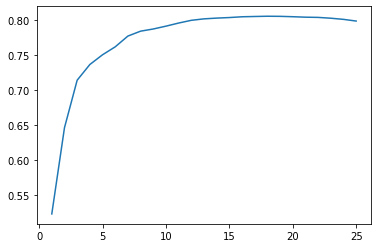

In [47]:
plt.plot(sf.index, sf['avg_score'])

In [48]:
sf2 = sf[sf['avg_score']==sf['avg_score'].max()]
f = list(sf2['feature_names'])
f

## these are the variables it selected.

[('CRIM',
  'CHAS',
  'RM',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT',
  'ZN2',
  'NOX2',
  'RM2',
  'DIS2',
  'RAD2',
  'TAX2',
  'PTRATIO2',
  'B2',
  'LSTAT2')]

In [49]:
## Converting the tuple into list

sel = [i  for i in f[0]]
sel

['CRIM',
 'CHAS',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'ZN2',
 'NOX2',
 'RM2',
 'DIS2',
 'RAD2',
 'TAX2',
 'PTRATIO2',
 'B2',
 'LSTAT2']

In [50]:
len(sel)

18

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X[sel], y, test_size=0.33, random_state=42)

lir = LinearRegression()                   

lir.fit(X_train, y_train)

y_test_pred = lir.predict(X_test)
print('Test-rsquared: ',r2_score(y_test, y_test_pred))

Test-rsquared:  0.7647273435279839


# Day-03-Regularization

In [52]:
from sklearn.datasets import load_boston
boston = load_boston()

In [53]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['price'] = boston.target

In [54]:
bos = bos.sample(frac=1, random_state=4).reset_index(drop=True)

In [55]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
1,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51,24.8
2,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09,17.4
3,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98,19.3
4,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6


In [56]:
y = bos['price']
X = bos.drop('price',axis=1)

In [57]:
## This is just to make the data complex

cols = list(X.columns)
cols.remove('CHAS')

for col in cols:
    X[col+'2'] = X[col]**2
    
cols = list(X.columns)
cols

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'CRIM2',
 'ZN2',
 'INDUS2',
 'NOX2',
 'RM2',
 'AGE2',
 'DIS2',
 'RAD2',
 'TAX2',
 'PTRATIO2',
 'B2',
 'LSTAT2']

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
## lets standardize the data
## for regularization we need to standardize the data.

from  sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)                ## only transform


## when we standarize the data it becomes into array so convert into Dataframe.
X_trains = pd.DataFrame(X_trains, columns=X.columns)
X_tests = pd.DataFrame(X_tests, columns=X.columns)

# Lasso Regularization.

In [60]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [61]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_trains, y_train)

pd.DataFrame(lasso.coef_, index=X.columns, columns=['coefs'])

,coefs
CRIM,-0.000000
ZN,0.000000
INDUS,-0.000000
CHAS,0.466960
NOX,-0.000000
RM,0.000000
AGE,-0.000000
DIS,-0.067276
RAD,-0.000000
TAX,-0.090535


### Note: Lasso set most coefficents to zero, as expected from a large alpha value.

## Simulation to understand the impact of alpha

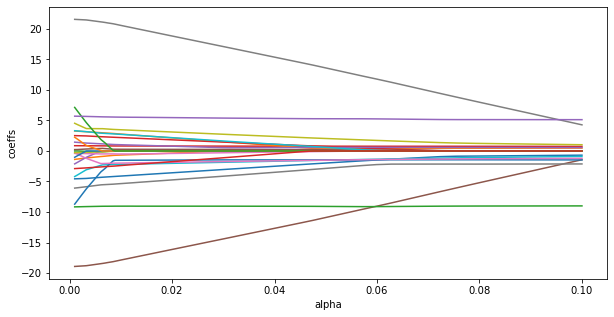

In [62]:
## Considers the smaller interval values (which in linspace it doesnot includes smaller interval values)

alphas = np.logspace(-3, -1, 100)
coefs = []

for a in alphas:
    model = Lasso(alpha=a, max_iter=5000)
    model.fit(X_trains, y_train)
    coefs.append(model.coef_)

plt.figure(figsize=[10,5])    
plt.plot(alphas, coefs) 
plt.xlabel('alpha')
plt.ylabel('coeffs')
plt.show()

### Note: As alpha increases , Lasso is setting more coeffiecnts to zero.

# Tuning to Identify best Alpha through Cross Validation:

In [63]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-3, -1, 100)

lasso_cv = LassoCV(alphas=alphas, cv=3, max_iter=5000, random_state=4)

lasso_cv.fit(X_trains, y_train)

LassoCV(alphas=array([0.001     , 0.00104762, 0.0010975 , 0.00114976, 0.0012045 ,
       0.00126186, 0.00132194, 0.00138489, 0.00145083, 0.00151991,
       0.00159228, 0.0016681 , 0.00174753, 0.00183074, 0.00191791,
       0.00200923, 0.0021049 , 0.00220513, 0.00231013, 0.00242013,
       0.00253536, 0.00265609, 0.00278256, 0.00291505, 0.00305386,
       0.00319927, 0.0033516 , 0.00351119, 0.00367838, 0.00385353,
       0.004037...
       0.02595024, 0.02718588, 0.02848036, 0.02983647, 0.03125716,
       0.03274549, 0.03430469, 0.03593814, 0.03764936, 0.03944206,
       0.04132012, 0.04328761, 0.04534879, 0.0475081 , 0.04977024,
       0.05214008, 0.05462277, 0.05722368, 0.05994843, 0.06280291,
       0.06579332, 0.06892612, 0.07220809, 0.07564633, 0.07924829,
       0.08302176, 0.0869749 , 0.09111628, 0.09545485, 0.1       ]),
        cv=3, max_iter=5000, random_state=4)

In [64]:
## This is the best alpha

lasso_cv.alpha_

0.014174741629268055

In [65]:
from sklearn.metrics import r2_score

lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=5000)
lasso.fit(X_trains, y_train)

y_train_pred = lasso.predict(X_trains)
print('Train-rsquared:',r2_score(y_train, y_train_pred))

y_test_pred = lasso.predict(X_tests)
print('Test-rsquared:',r2_score(y_test, y_test_pred))

Train-rsquared: 0.8547482193758865
Test-rsquared: 0.7469273145540818


In [66]:
## can do feature selection by this by removing the features having coeff zero

pd.DataFrame(lasso.coef_, index=X.columns, columns=['coeffs'])

,coeffs
CRIM,-3.886188
ZN,-0.536282
INDUS,-0.000000
CHAS,0.813094
NOX,-0.000000
RM,-17.143819
AGE,-0.470957
DIS,-5.093268
RAD,3.322542
TAX,-2.123489


# Ridge

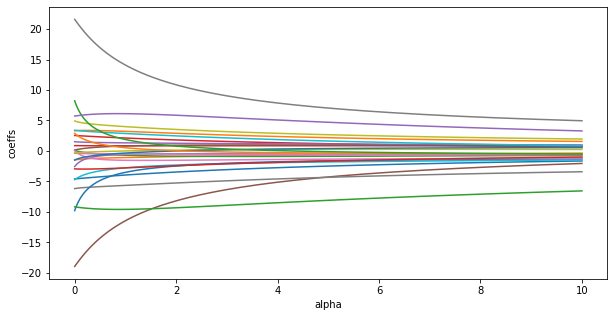

In [67]:
## Ridge can have large alpha compare to the Lasso

alphas = np.logspace(-3, 1, 100)
coefs = []

for a in alphas:
    model = Ridge(alpha=a, max_iter=5000)
    model.fit(X_trains, y_train)
    coefs.append(model.coef_)

plt.figure(figsize=[10,5])    
plt.plot(alphas, coefs) 
plt.xlabel('alpha')
plt.ylabel('coeffs')
plt.show()

### Note: The figure shows that as alpha increase coeffiecent magnitude reducing.

# Tuning to Identify best Alpha through Cross Validation:

In [68]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-3, 0, 100)

ridge_cv = RidgeCV(alphas=alphas, cv=3 )

ridge_cv.fit(X_trains, y_train)

RidgeCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=3)

In [69]:
ridge_cv.alpha_

0.21544346900318845

In [70]:
from sklearn.metrics import r2_score

ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_trains, y_train)

y_train_pred = ridge.predict(X_trains)
print('Train-rsquared:',r2_score(y_train, y_train_pred))

y_test_pred = ridge.predict(X_tests)
print('Test-rsquared:',r2_score(y_test, y_test_pred))

Train-rsquared: 0.8577548618693334
Test-rsquared: 0.736821937276498


# Elastic Net Regularization.

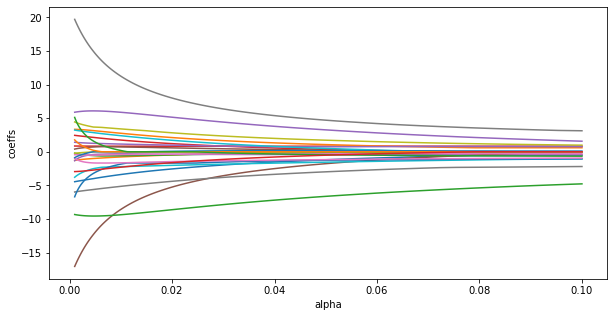

In [71]:
### simulation for understanding

alphas = np.logspace(-3, -1, 100)
coefs = []

for a in alphas:
    model = ElasticNet(alpha=a, max_iter=5000)
    model.fit(X_trains, y_train)
    coefs.append(model.coef_)

plt.figure(figsize=[10,5])    
plt.plot(alphas, coefs) 
plt.xlabel('alpha')
plt.ylabel('coeffs')
plt.show()

### Note: Figure shows that electric net got the property of Ridge (some coeffs are reduced in magnitude), and Lasso (some coeffs are set to zero)

In [205]:
from sklearn.model_selection import GridSearchCV

model = ElasticNet(max_iter=5000000)

params = [{'alpha':list(np.logspace(-3, 0, 100)),
          'l1_ratio': list(np.linspace(0.01,1,10)) }]

gsearch = GridSearchCV(model, param_grid=params, scoring='r2', cv=3, return_train_score=True)
gsearch.fit(X_trains,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(max_iter=5000000),
             param_grid=[{'alpha': [0.001, 0.0010722672220103231,
                                    0.0011497569953977356,
                                    0.0012328467394420659,
                                    0.0013219411484660286,
                                    0.0014174741629268048,
                                    0.0015199110829529332,
                                    0.0016297508346206436, 0.001747528400007683,
                                    0.001873817422860383, 0.002009233002565048,
                                    0.0021544346900318843,
                                    0.0023101297000831605,
                                    0.00...
                                    0.0032745491628777285, 0.003511191734215131,
                                    0.0037649358067924675, 0.004037017258596553,
                                    0.004328761281083057, 0.004641588833612782,
               

In [73]:
gsearch.best_params_

{'alpha': 0.014174741629268055, 'l1_ratio': 1.0}

In [204]:
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet

elasticNet = ElasticNet(**gsearch.best_params_, max_iter=500000)
elasticNet.fit(X_trains, y_train)

y_train_pred = elasticNet.predict(X_trains)
print('Train-rsquared:',r2_score(y_train, y_train_pred))

y_test_pred = elasticNet.predict(X_tests)
print('Test-rsquared:',r2_score(y_test, y_test_pred))

TypeError: __init__() got an unexpected keyword argument 'ridge__alpha'

# Day-04 Feature Engineering

In [75]:
from sklearn.datasets import load_boston
boston = load_boston()

In [76]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['price'] = boston.target

In [78]:
bos = bos.sample(frac=1, random_state=4).reset_index(drop=True)

In [79]:
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
1,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51,24.8


In [80]:
y = bos['price']
X = bos.drop('price',axis=1)

In [81]:
import statsmodels.api as sm

X = X[['LSTAT']]
Xc = sm.add_constant(X)

In [82]:
model = sm.OLS(y, Xc).fit()

y_pred = model.predict(Xc)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           5.08e-88
Time:                        10:38:52   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

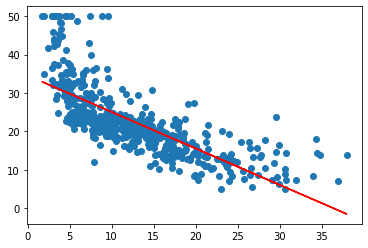

In [97]:
plt.scatter(X, y)
plt.plot(X, y_pred,'r')
plt.show()

## Impact of square tames on model fit:

In [93]:
## Adding LSTAT square tame

Xc['LSTAT2'] = Xc['LSTAT']**2
Xc['LSTAT3'] = Xc['LSTAT']**3

In [94]:
Xc.head()

,const,LSTAT,LSTAT2,LSTAT3
0,1.0,29.93,895.8049,26811.440657
1,1.0,9.51,90.4401,860.085351
2,1.0,13.09,171.3481,2242.946629
3,1.0,23.98,575.0404,13789.468792
4,1.0,3.13,9.7969,30.664297


In [95]:
model2 = sm.OLS(y, Xc).fit()
y_pred2 = model2.predict(Xc)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     321.7
Date:                Thu, 03 Jun 2021   Prob (F-statistic):          1.78e-116
Time:                        10:47:33   Log-Likelihood:                -1568.9
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     502   BIC:                             3163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.6496      1.435     33.909      0.000      45.831      51.468
LSTAT         -3.8656      0.329    -11.757      0.000      -4.512      -3.220
LSTAT2         0.1487      0.021      6.983      0.000       0.107       0.191
LSTAT3        -0.0020      0.000     -5.013      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      107.925   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.171
Skew:                           1.088   Prob(JB):                     8.69e-57
Kurtosis:                       5.741   Cond. No.                     5.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

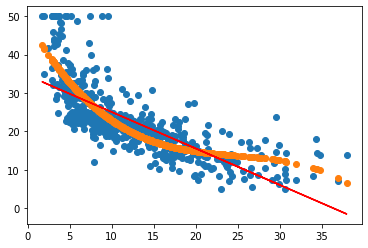

In [96]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')

plt.scatter(X, y_pred2)   ## for square its curve so plot scatter

plt.show()

## Application of Polynomial Features.

In [111]:
y = bos['price']
X = bos.drop('price',axis=1)

In [112]:
from sklearn.preprocessing import PolynomialFeatures 
pf = PolynomialFeatures()

Xp = pf.fit_transform(X)

In [113]:
cols = pf.get_feature_names(X.columns)
Xp = pd.DataFrame(Xp, columns=cols)
Xp = Xp.drop('CHAS^2',axis=1)

In [115]:
Xp.head()

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,1.0,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,...,96721.0,4727.2,120241.93,9308.23,231.04,5876.776,454.936,149482.7569,11571.8359,895.8049
1,1.0,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,...,85849.0,4863.8,108913.96,2786.43,275.56,6170.552,157.866,138175.7584,3535.0572,90.4401
2,1.0,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,...,119025.0,6520.5,136930.50,4516.05,357.21,7501.410,247.401,157529.6100,5195.4210,171.3481
3,1.0,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,...,76729.0,5152.2,109481.48,6642.46,345.96,7351.464,446.028,156214.6576,9477.8552,575.0404
4,1.0,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,...,94249.0,5341.8,118925.66,960.91,302.76,6740.412,54.462,150063.2644,1212.4994,9.7969


In [117]:
Xp.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 104 columns):
 #   Column         Dtype  
---  ------         -----  
 0   1              float64
 1   CRIM           float64
 2   ZN             float64
 3   INDUS          float64
 4   CHAS           float64
 5   NOX            float64
 6   RM             float64
 7   AGE            float64
 8   DIS            float64
 9   RAD            float64
 10  TAX            float64
 11  PTRATIO        float64
 12  B              float64
 13  LSTAT          float64
 14  CRIM^2         float64
 15  CRIM ZN        float64
 16  CRIM INDUS     float64
 17  CRIM CHAS      float64
 18  CRIM NOX       float64
 19  CRIM RM        float64
 20  CRIM AGE       float64
 21  CRIM DIS       float64
 22  CRIM RAD       float64
 23  CRIM TAX       float64
 24  CRIM PTRATIO   float64
 25  CRIM B         float64
 26  CRIM LSTAT     float64
 27  ZN^2           float64
 28  ZN INDUS       float64
 29  ZN CHAS        float6

In [118]:
model = sm.OLS(y, Xp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     51.06
Date:                Thu, 03 Jun 2021   Prob (F-statistic):          1.19e-179
Time:                        10:57:54   Log-Likelihood:                -1171.0
No. Observations:                 506   AIC:                             2550.
Df Residuals:                     402   BIC:                             2990.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
1              -175.2819     85.173     -2.058      0.040    -342.723      -7.841
CRIM             -4.5522      6.895     -0.660      0.509     -18.107       9.003
ZN                0.2067      0.481      0.430      0.667      -0.738       1.152
INDUS            -4.6452      1.898     -2.448      0.015      -8.376      -0.914
CHAS             59.4267     20.103      2.956      0.003      19.907      98.947
NOX             133.8581    128.821      1.039      0.299    -119.389     387.105
RM               21.6864      7.897      2.746      0.006       6.162      37.211
AGE               0.9078      0.289      3.138      0.002       0.339       1.477
DIS              -7.4828      5.022     -1.490      0.137     -17.356       2.390
RAD               1.9508      2.536      0.769      0.442      -3.034       6.936
TAX               0.0217      0.142      0.153      0.879      -0.257       0.300
PTRATIO           6.4428      3.995      1.613      0.108      -1.411      14.297
B                 0.0944      0.075      1.266      0.206      -0.052       0.241
LSTAT             0.7237      0.894      0.809      0.419      -1.034       2.482
CRIM^2            0.0016      0.001      1.261      0.208      -0.001       0.004
CRIM ZN           0.2170      0.194      1.118      0.264      -0.164       0.598
CRIM INDUS        0.3946      0.468      0.842      0.400      -0.526       1.315
CRIM CHAS         2.4904      0.561      4.440      0.000       1.388       3.593
CRIM NOX         -0.7206      0.914     -0.789      0.431      -2.517       1.076
CRIM RM           0.1374      0.061      2.261      0.024       0.018       0.257
CRIM AGE         -0.0031      0.004     -0.818      0.414      -0.011       0.004
CRIM DIS         -0.0957      0.107     -0.892      0.373      -0.307       0.115
CRIM RAD          0.2146      0.621      0.346      0.730      -1.006       1.435
CRIM TAX         -0.0241      0.046     -0.527      0.598      -0.114       0.066
CRIM PTRATIO      0.3847      0.331      1.162      0.246      -0.266       1.036
CRIM B           -0.0003      0.000     -1.766      0.078      -0.001     3.7e-05
CRIM LSTAT        0.0208      0.007      3.068      0.002       0.007       0.034
ZN^2             -0.0005      0.001     -0.787      0.432      -0.002       0.001
ZN INDUS         -0.0052      0.005     -1.029      0.304      -0.015       0.005
ZN CHAS          -0.0625      0.064     -0.978      0.328      -0.188       0.063
ZN NOX           -1.0460      0.620     -1.687      0.092      -2.265       0.173
ZN RM             0.0136      0.027      0.503      0.615      -0.040       0.067
ZN AGE         7.228e-05      0.001      0.083      0.934      -0.002       0.002
ZN DIS           -0.0103      0.010     -1.065      0.288      -0.029       0.009
ZN RAD           -0.0050      0.007     -0.718   

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [126]:
vf = [vif(Xp.values, i)   for i in range(Xp.shape[1])]

pd.DataFrame(vf, columns=['vif'])

,vif
0,486527.916730
1,235437.667731
2,8411.828989
3,11347.464335
4,1745.038856
...,...
99,2549.452841
100,1312.290049
101,59.286710
102,78.617922


In [136]:
cols = list(Xp.columns)

while (len(cols)>0):
    X1 = Xp[cols]
    model = sm.OLS(y, X1).fit()
    p = model.pvalues
    p = p.drop('1')
    pmax = max(p)
    feature_pmax = p.idxmax()
    if (pmax > 0.05):
        cols.remove(feature_pmax)
        print('removed:',feature_pmax, 'p-value:', pmax)
    else:
        break
print('\n')
selected_features = cols
print('selected_features:',selected_features)

removed: INDUS CHAS p-value: 0.997626415935126
removed: AGE PTRATIO p-value: 0.9906664199553744
removed: ZN AGE p-value: 0.9322961934051581
removed: RAD B p-value: 0.9172481159592742
removed: TAX p-value: 0.8998551430845789
removed: CHAS TAX p-value: 0.8539308690883034
removed: CHAS RAD p-value: 0.937572249787141
removed: RM DIS p-value: 0.8403775656255044
removed: PTRATIO LSTAT p-value: 0.8112461387421146
removed: NOX RM p-value: 0.8130148905420642
removed: PTRATIO^2 p-value: 0.7862015170307058
removed: CHAS AGE p-value: 0.7827997682606405
removed: INDUS RAD p-value: 0.7150959455393153
removed: INDUS PTRATIO p-value: 0.7514690473258954
removed: CRIM RAD p-value: 0.7097354297726781
removed: AGE^2 p-value: 0.6656180918724102
removed: INDUS TAX p-value: 0.6472788422220453
removed: RM RAD p-value: 0.7166549564021387
removed: INDUS NOX p-value: 0.6009150012535547
removed: ZN p-value: 0.56246803247972
removed: NOX B p-value: 0.6032024002687888
removed: NOX^2 p-value: 0.6052061286889836
remo

In [131]:
## Building a model using selected features:

Xp2 = Xp[selected_features]

model = sm.OLS(y, Xp2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     113.4
Date:                Thu, 03 Jun 2021   Prob (F-statistic):          6.11e-222
Time:                        11:06:54   Log-Likelihood:                -1198.5
No. Observations:                 506   AIC:                             2493.
Df Residuals:                     458   BIC:                             2696.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
1              -67.3468     22.652     -2.973      0.003    -111.861     -22.833
INDUS           -4.3971      0.566     -7.773      0.000      -5.509      -3.285
CHAS            61.8147     10.639      5.810      0.000      40.908      82.721
RM              18.8871      4.386      4.306      0.000      10.267      27.507
AGE              0.8759      0.123      7.134      0.000       0.635       1.117
DIS            -11.5909      1.594     -7.270      0.000     -14.724      -8.458
RAD              1.0871      0.452      2.403      0.017       0.198       1.976
PTRATIO          3.5116      1.150      3.053      0.002       1.251       5.772
CRIM CHAS        2.3279      0.365      6.380      0.000       1.611       3.045
CRIM RM          0.1354      0.033      4.153      0.000       0.071       0.199
CRIM TAX        -0.0020      0.000     -5.269      0.000      -0.003      -0.001
CRIM LSTAT       0.0172      0.004      4.256      0.000       0.009       0.025
ZN NOX          -0.4962      0.198     -2.507      0.013      -0.885      -0.107
ZN RM            0.0277      0.009      3.085      0.002       0.010       0.045
ZN TAX           0.0006      0.000      4.967      0.000       0.000       0.001
ZN PTRATIO      -0.0088      0.004     -2.226      0.027      -0.017      -0.001
INDUS^2          0.0394      0.007      6.044      0.000       0.027       0.052
INDUS RM         0.3802      0.074      5.135      0.000       0.235       0.526
INDUS B          0.0032      0.001      4.161      0.000       0.002       0.005
CHAS NOX       -37.9147      5.845     -6.486      0.000     -49.402     -26.427
CHAS RM         -4.6561      0.741     -6.282      0.000      -6.113      -3.199
CHAS PTRATIO    -0.6866      0.347     -1.978      0.049      -1.369      -0.005
NOX DIS         16.3322      2.608      6.263      0.000      11.207      21.457
NOX RAD         -3.0051      0.578     -5.200      0.000      -4.141      -1.869
NOX TAX          0.2106      0.042      5.010      0.000       0.128       0.293
NOX PTRATIO     -7.2164      1.151     -6.272      0.000      -9.477      -4.955
NOX LSTAT        0.6909      0.321      2.155      0.032       0.061       1.321
RM^2             0.5025      0.221      2.274      0.023       0.068       0.937
RM AGE          -0.0746      0.014     -5.310      0.000      -0.102      -0.047
RM TAX          -0.0202      0.003     -7.233      0.000      -0.026      -0.015
RM PTRATIO      -0.5331      0.126     -4.237      0.000      -0.780      -0.286
RM LSTAT        -0.1366      0.032     -4.254      0.000      -0.200      -0.074
AGE RAD          0.0120      0.003      3.935      0.000       0.006       0.018
AGE TAX         -0.0005      0.000     -3.356      0.001      -0.001      -0.000
AGE B           -0.0008      0.000     -5.295      0.000      -0.001      -0.000
AGE L

In [141]:
vf = [vif(Xp2.values, i)     for i in range(Xp2.shape[1])]
pd.DataFrame(vf , index=Xp2.columns, columns=['vif']).sort_values(by='vif',ascending=False)

,vif
1,35172.953336
RAD TAX,7271.840074
RAD^2,4032.165176
NOX TAX,2313.053036
TAX PTRATIO,1292.155668
RAD,1061.813275
INDUS,1030.344661
NOX RAD,873.414577
AGE,817.164335
DIS,771.213202


In [149]:
### After building the model with selected features, Compute vif.
### Sort the Vif value descending order.
### Remove the Variables vif value have higher one by one which is highest.
### Continue the process till we get the top vif value less or equal to 10


Xp3 = Xp2.drop(['RAD TAX','NOX TAX'],axis=1)
model = sm.OLS(y, Xp3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     105.4
Date:                Thu, 03 Jun 2021   Prob (F-statistic):          4.37e-213
Time:                        11:16:08   Log-Likelihood:                -1226.4
No. Observations:                 506   AIC:                             2545.
Df Residuals:                     460   BIC:                             2739.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
1              -54.1478     23.557     -2.299      0.022    -100.440      -7.856
INDUS           -3.1355      0.561     -5.590      0.000      -4.238      -2.033
CHAS            62.5540     11.201      5.585      0.000      40.542      84.566
RM              19.0398      4.622      4.120      0.000       9.958      28.122
AGE              0.9355      0.129      7.250      0.000       0.682       1.189
DIS             -8.9931      1.522     -5.907      0.000     -11.985      -6.001
RAD              1.1278      0.419      2.690      0.007       0.304       1.952
PTRATIO          1.2579      1.066      1.180      0.239      -0.837       3.353
CRIM CHAS        2.2923      0.383      5.989      0.000       1.540       3.044
CRIM RM          0.1298      0.034      3.782      0.000       0.062       0.197
CRIM TAX        -0.0019      0.000     -4.756      0.000      -0.003      -0.001
CRIM LSTAT       0.0154      0.004      3.624      0.000       0.007       0.024
ZN NOX          -0.7448      0.206     -3.624      0.000      -1.149      -0.341
ZN RM            0.0240      0.009      2.588      0.010       0.006       0.042
ZN TAX           0.0004      0.000      3.399      0.001       0.000       0.001
ZN PTRATIO       0.0018      0.004      0.489      0.625      -0.005       0.009
INDUS^2          0.0209      0.006      3.307      0.001       0.008       0.033
INDUS RM         0.3191      0.077      4.145      0.000       0.168       0.470
INDUS B          0.0020      0.001      2.537      0.011       0.000       0.004
CHAS NOX       -34.9323      6.143     -5.686      0.000     -47.005     -22.860
CHAS RM         -4.6264      0.775     -5.968      0.000      -6.150      -3.103
CHAS PTRATIO    -0.8395      0.365     -2.298      0.022      -1.557      -0.122
NOX DIS         10.8341      2.479      4.370      0.000       5.962      15.706
NOX RAD         -0.5752      0.407     -1.412      0.158      -1.375       0.225
NOX PTRATIO     -2.8721      0.715     -4.016      0.000      -4.278      -1.467
NOX LSTAT        1.2730      0.317      4.019      0.000       0.651       1.895
RM^2             0.5048      0.233      2.168      0.031       0.047       0.963
RM AGE          -0.0886      0.015     -6.040      0.000      -0.117      -0.060
RM TAX          -0.0132      0.003     -4.821      0.000      -0.019      -0.008
RM PTRATIO      -0.5973      0.132     -4.522      0.000      -0.857      -0.338
RM LSTAT        -0.1900      0.032     -5.950      0.000      -0.253      -0.127
AGE RAD          0.0075      0.003      2.462      0.014       0.002       0.013
AGE TAX         -0.0003      0.000     -1.838      0.067      -0.001    1.79e-05
AGE B           -0.0008      0.000     -5.113      0.000      -0.001      -0.000
AGE LSTAT       -0.0094      0.002     -6.175      0.000      -0.012      -0.006
DIS^2

In [148]:
vf = [vif(Xp3.values, i)     for i in range(Xp3.shape[1])]
pd.DataFrame(vf , index=Xp3.columns, columns=['vif']).sort_values(by='vif',ascending=False)

,vif
1,34213.964009
TAX PTRATIO,1275.576925
INDUS,911.097093
RAD,820.148308
AGE,811.869285
RM,648.835187
DIS,632.382691
INDUS RM,614.260647
TAX^2,554.319036
AGE TAX,534.005629


## Linear Regression - Machine Learning Approach

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.33, random_state=42)

In [183]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

lir = LinearRegression()
lir.fit(X_train, y_train)

y_train_pred = lir.predict(X_train)
print('Train-rsquared:',r2_score(y_train, y_train_pred))

y_test_pred = lir.predict(X_test)
print('Test-rsquared:',r2_score(y_test, y_test_pred))

Train-rsquared: 0.9403016672612942
Test-rsquared: 0.7425711287469716


# Lasso Regression.

### Tuning to find the best Alpha

In [184]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

In [186]:
model = Pipeline( [ ('ss', StandardScaler()),
                    ('Lasso',Lasso(max_iter=500000))])

params = {'Lasso__alpha': list(np.logspace(-3, 0, 100))}

gsearch = GridSearchCV(model, param_grid=params, scoring='r2', cv=3, return_train_score=True)
 
gsearch.fit(Xp,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('ridge', Lasso(max_iter=500000))]),
             param_grid={'ridge__alpha': [0.001, 0.0010722672220103231,
                                          0.0011497569953977356,
                                          0.0012328467394420659,
                                          0.0013219411484660286,
                                          0.0014174741629268048,
                                          0.0015199110829529332,
                                          0.0016297508346206436,
                                          0.001747528400007683,
                                          0.001873817422860383,
                                          0.002009233002565...
                                          0.002848035868435802,
                                          0.0030538555088334154,
                                          0.00327454916287

In [187]:
gsearch.best_params_

{'ridge__alpha': 0.1}

In [195]:
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.33, random_state=42)


## standardize
X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_trains, y_train)

y_train_pred = lasso.predict(X_trains)
print('Train-rsquared:',r2_score(y_train, y_train_pred))

y_test_pred = lasso.predict(X_tests)
print('Test-rsquared:',r2_score(y_test, y_test_pred))

Train-rsquared: 0.8592661594298558
Test-rsquared: 0.8040147960906698


In [196]:
pd.DataFrame(lasso.coef_, index=Xp.columns, columns=['coef'])

,coef
1,0.000000
CRIM,-0.000000
ZN,0.000000
INDUS,0.000000
CHAS,0.000000
...,...
PTRATIO B,0.000000
PTRATIO LSTAT,-0.000000
B^2,-0.000000
B LSTAT,-0.000000


## Boxcox transformation.